## ECS 171 Homework 1

Please explain your solutions clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. Please put your work/solution for each question after the corresponding horizontal line in a separate coding or markdown box. Feel free to add coding or markdown boxes as you see fit. Usage of the numpy, pandas, seaborn, matplotlib and sklearn libraries are allowed.

For this assignmennt I suggest sticking with these libraries so we can more easily streamline the learning process and advice we give as TAs. If the professor says otherwise then feel free to follow her instructions.

### Question 1 - (5 points)
How does the presence of outliers influence the choice between using covariance and correlation to analyze the relationship between two variables in a dataset? Explain how each measure handles outliers differently and discuss the implications for interpreting their results in practical applications.
***



Here you can how outliers effect covariance and correlation when they are applied to a dataset. This should pretty much follow the lecture material.

You can look into how having different levels of covariance/correlation could have different implications.

When discussing practical application this mainly refers to how these measures could effect more real-world data. In this section feel free to also use some sort of real-world example if you need to in order to help your explanation.

### Question 2 - (25 points)
The following code provides the distribution of the attributes of the breast cancer dataset from sklearn library. 


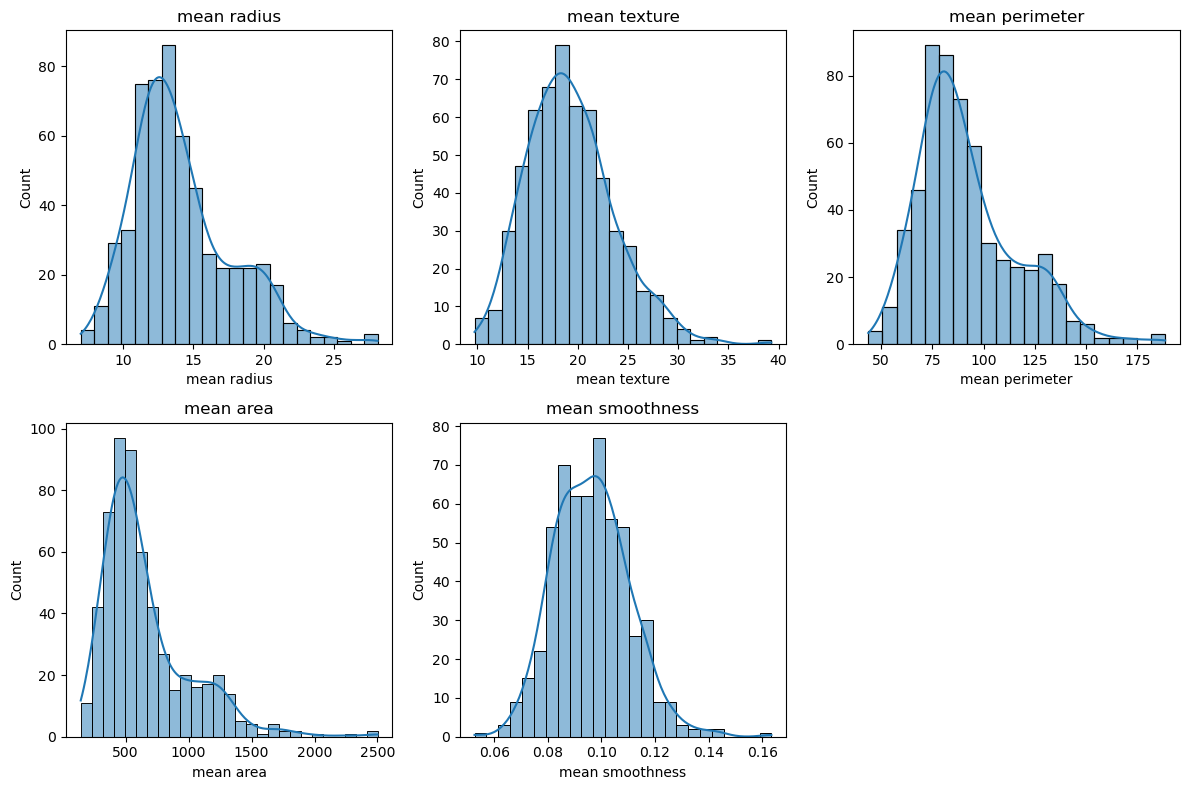


mean:
mean radius         14.127292
mean texture        19.289649
mean perimeter      91.969033
mean area          654.889104
mean smoothness      0.096360
dtype: float64 , 
median:
mean radius         13.37000
mean texture        18.84000
mean perimeter      86.24000
mean area          551.10000
mean smoothness      0.09587
dtype: float64 , 
std:
 mean radius          3.524049
mean texture         4.301036
mean perimeter      24.298981
mean area          351.914129
mean smoothness      0.014064
dtype: float64


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Plot histograms for some of the features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

#### Question 2.1 - (10 points)
Analyze each plot and explain your observations regarding these attributes in terms of data skewness (for instance, is the data symmetric, if not is it right/left skewed? Why and how do you identify the skewness by using the parameters of the distributions such as mean, median, standard deviation?) Provide a complete analysis and incude any supporting explanation/computation if relevant.
***

Visually, the bulk of the data points fall in the left portions of the graphs for all the data values.

The mean of mean radius (14.127292) is greater than median of mean radius (13.37000), indicating right skew.
The mean of mean texture (19.289649) is greater than the median of mean texture (18.84000), indicating right skew.
The mean of mean perimeter (91.969033) is greater than the median of mean perimeter (86.24000), indicating right skew.
The mean of mean area (654.889104) is greater than the median of mean area (551.10000), indicating right skew.
The mean of mean smoothness (0.096360) is greater than the median of mean smoothness (0.09587), indicating right skew.

Overall, this means that for most properties, a larger number of data points fall on the left side-- and that most of the outliers are on the right side of the distribution. 

The skewness calculations follow in the code block below, given the equation 3*(mean-median)/stdev, as given by Pearson's median skewness coefficient.

Skewness coefficient for:

mean radius: 0.6446777556157716
mean texture: 0.31363304096966466
mean perimeter: 0.7073176854617896
mean area: 0.8847820713671881
mean smoothness: 0.10452218430034221

In [33]:
mean_values = {
    'mean radius': 14.127292,
    'mean texture': 19.289649,
    'mean perimeter': 91.969033,
    'mean area': 654.889104,
    'mean smoothness': 0.096360
}

median_values = {
    'mean radius': 13.37000,
    'mean texture': 18.84000,
    'mean perimeter': 86.24000,
    'mean area': 551.10000,
    'mean smoothness': 0.09587
}

std_values = {
    'mean radius': 3.524049,
    'mean texture': 4.301036,
    'mean perimeter': 24.298981,
    'mean area': 351.914129,
    'mean smoothness': 0.014064
}

# Calculate Pearson median skewness coefficient for each feature
skewness = {}
for feature in mean_values:
    pearson_coeff = 3 * (mean_values[feature] - median_values[feature]) / std_values[feature]
    skewness[feature] = pearson_coeff

print(skewness)

{'mean radius': 0.6446777556157716, 'mean texture': 0.31363304096966466, 'mean perimeter': 0.7073176854617896, 'mean area': 0.8847820713671881, 'mean smoothness': 0.10452218430034221}


---
#### Question 2.2 - (5 points)
Explain and compare the parameters and output of Z-score and Min-Max data transformation techniques. 
***

Z-score transformation technique takes the value, the mean, and the standard deviation of the dataset (which is presumably normal or normal-adjacent after some pre-processing using methods such as logarithmic or square root transformations) to calculate standardized z-score value, converting the location on the actual distribution to a location on a standardized distribution centered on 1 with a standard deviation of 1. 

Min-max data transformation technique takes the difference between the minimum and maximum of the data, giving us a linear transformation according to the formula (x-xmin)/(xmax-xmin), outputting a value between 0 and 1.



#### Question 2.3 - (5 points)
Apply the Z-score normalization technique on the dataset. You can either develop the normalization function from scratch, or use sklearn.preprocessing to make function calls to perform the transformation. After data normalization, visualize the normalized attributes (note: don't normalize the output variable - apply normalization on these attributes: 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'). Compare the data before and after normalization. What changes you see in the data? 
***

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

scaler = StandardScaler();
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
for feature in features_to_plot:
    df[feature] = scaler.fit_transform(df[feature])
# Plot histograms for some of the features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

Feel free to check page 119 from the textbook and sklearn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

From stratch: z = (x - μ) / σ

You can use the 2.1 code as a baseline and change the dataframe so it fits using the standardscaler or just update the df manually.
Either way this should not require much change from 2.1 code

#### Question 2.4 - (5 points)
Find the outliers in the data (for the identified attributes) if any, by computing the interquartile ranges for Q1, Q2, Q3, IQR, min and max. Also visualize the outliers if any. 
***

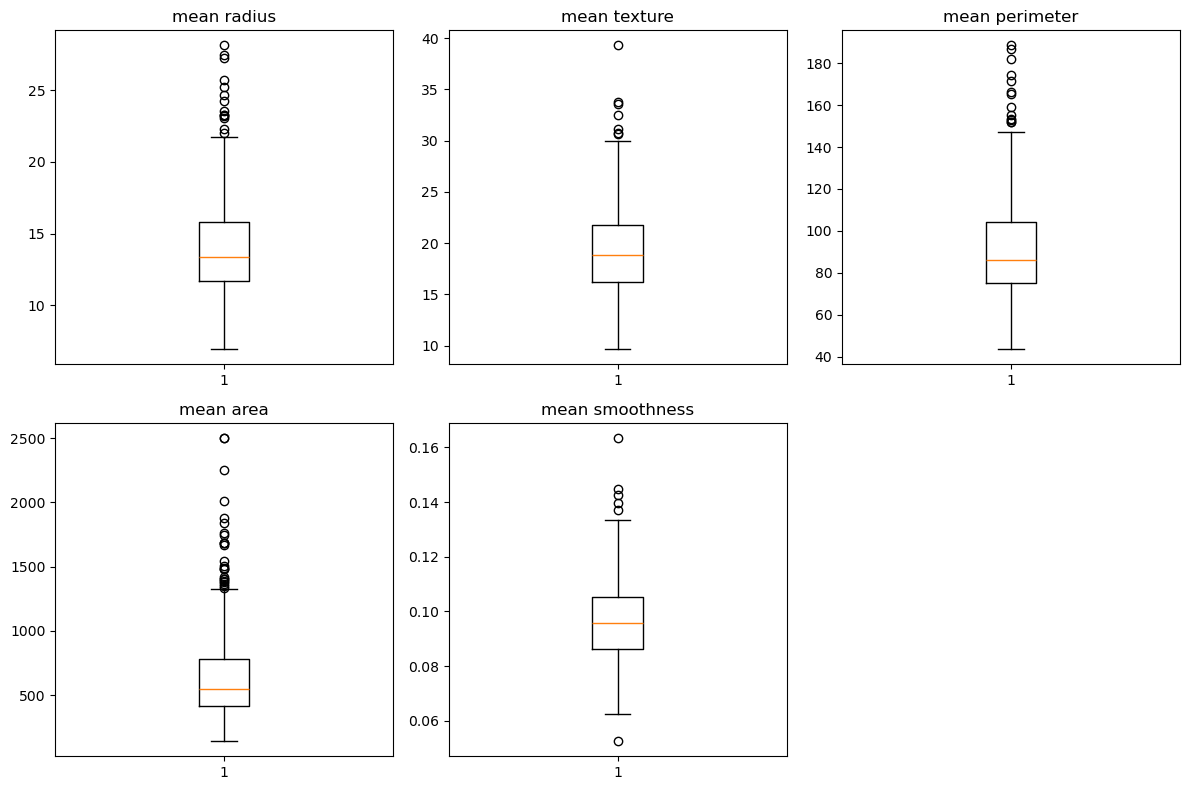

mean radius's upper outliers:
82     25.22
108    22.27
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
369    22.01
461    27.42
503    23.09
521    24.63
Name: mean radius, dtype: float64
mean texture's upper outliers:
219    32.47
232    33.81
239    39.28
259    33.56
265    31.12
455    30.72
562    30.62
Name: mean texture, dtype: float64
mean perimeter's upper outliers:
82     171.5
108    152.8
122    166.2
164    152.1
180    182.1
202    158.9
212    188.5
236    153.5
339    155.1
352    174.2
461    186.9
503    152.1
521    165.5
Name: mean perimeter, dtype: float64
mean area's upper outliers:
23     1404.0
82     1878.0
108    1509.0
122    1761.0
164    1686.0
180    2250.0
202    1685.0
212    2499.0
236    1670.0
250    1364.0
265    1419.0
272    1491.0
339    1747.0
352    2010.0
368    1546.0
369    1482.0
372    1386.0
373    1335.0
393    1407.0
449    1384.0
461    2501.0
503    1682.0
521    1841.0
563    1

In [26]:
# Use the boxplot method to plot the data. This will show the outliers.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
plt.figure(figsize=(12, 8))

# Plot histograms for some of the features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i) 
    plt.boxplot(df[feature]) 
    plt.title(feature)

plt.tight_layout()
plt.show()

for feature in features_to_plot:  
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df[feature] < lower_bound
    outliers_upper = df[feature] > upper_bound

    if outliers_upper.any():
        print(f"{feature}'s upper outliers:\n{df.loc[outliers_upper, feature]}")
    if outliers_lower.any():
        print(f"{feature}'s lower outliers:\n{df.loc[outliers_lower, feature]}")

    df.loc[outliers_lower, feature] = lower_bound 
    df.loc[outliers_upper, feature] = upper_bound
#do this for texture, area, smoothness, perimeter, radius


You can reference discussion 1 here. Boxplots are a good way to visualize outliers. Here the outputs don't need to be exact but they should be quite close to our expected values.

### Question 3 - (30 points)
For this question, use the [California House Prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from sklearn. The goal is to develop a linear regression model to predict the target variable (MedHouseVal) which represents the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). Note that the precision of changes to look for in this dataset may be relatively small so keep an eye out for smaller changes in the difference between models - in the range of around 2 percent or more between models.

Note that we had originally used the Boston Housing Prices dataset that is featured in the textbook here. This dataset has ethical issues so we switched to the California Housing Dataset. This is why we included this warning to keep out for "smaller" changes. However, from lab I did notice that this dataset has some issues because it requires a newer version of scikit learn - 

For mac - '/Applications/Python\ 3.11/Install\ Certificates.command'

If you are still having issues with this, TA's can help

#### Question 3.1 - (10 points)
Split your data into train and test sets by [80:20] rate (80\% for training and 20\% for testing). Initialize a LinearRegression model using the LinearRegression algorithm in sklearn. Evaluate the performance of the model on the test data by reporting MSE and R2 values (you can call the existing functions in sklearn to report MSE and R2, or you can develop these techniques from scratch). Visualize the relationship between y and y_hat in test data (see the example plot covered during lec3-slide# 7).
***

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
housing = fetch_california_housing()

Here you can reference the lab 1 recording posted in modules for some examples on how you might split the training/test sets. You won't need to look at polynomial features but may find sklearn's mse and r2 functions useful.

You can split the data into the feature/target using .data and .target -> see documentation

sklearn documentation for LinearRegression -> OSL
.fit() takes in the training data
.predict() predicts the target

For the visualization you want to have a scatter plot with all the predicted vs actual values and a plot of a line through the target test minimum to maximum values 

reported mse values dont need to be 'exactly' accurate but should be close to the expected values (maybe a few hundredths away)

#### Question 3.2 - (10 points)
Repeat 3.1 using the normalized features to train your model (use z-score). Compare your findings from 3.1 and 3.2 and report any observations. 
***

Similar to 2.3

#### Question 3.3 - (10 points)
Implement cross validation method (from scratch), and apply 12-fold cross validation on your model to enhance the fit of your model. Report the mean of the R2 and MSE scores as the mse and R2 of the best model. Print the coefficients (i.e., weights) of the best model and explain what do you consider to be the best model. 
***

Should be similar to the lab - except you won't need to go through each polynomial degree and you will be using the normalized X values and you need to manually generate the k-folds yourself instead of using the in-built function. This means you will want to have k iterations and for each iteration of k you will use a separate fold - meaning you will basically rotate the fold you use as your testing set and the rest should be the training set.

Note that we are trying to reduce or minimize loss so keep this in mind when choosing the "best model".

I want to point out here that this is not how you would normally use cross-validation - which traditionally used by taking the average metric of loss across all folds in order to provide robust estimate of the model's generalization performance on unseen data. - The approach we are looking may lead to overfitting on a certain fold.

However, in some cases, you might have specific requirements or domain knowledge that justify looking for a model based on its performance on a particular fold or set of folds so I assume this is the purpose of this assignment - as well as to increase familiarity with the process.

### Question 4 - (20 points)
Answer the following questions:

#### Question 4.1 - (3 points)
What is the difference between Gradient Descent and Ordinary Lease Squares method? Explain the advantages and disadvantages of each approach.
***

As discussed in lecture

#### Question 4.2 - (2 points)
How does a negative or positive gradient indicate the direction towards achieving a sub-optimal or optimal weight? Explain your answer.
***

As discussed in lecture (consider a bowl w/lowest point being an optima)

#### Question 4.3 - (10 points)
Provide the complete math for updating Wj associated with the jth attribute of a dataset using Gradient Descent weight update rule for finding the coefficients of a linear regression model. Use the Sum of Squared Residuals (SSR) as the loss (or cost) function to compute the gradient (i.e., weight change). Provide all the necessary details explaining the parameters used in your work.
***

As discussed in lecture (@ end of 4/10 vod and gradient descent slide - the vod does cut out before she goes over this entirely)

The general idea is that you will need to expand the SSR formula then apply the chain rule.

Remember -- New Weight = Old Weight - Learning Rate * Gradient

Gradient is the derivative of SSR w.r.t corresponding weight
Make sure to explain all the parameters, the idea is that you should understand how this works and what the input/output is. For example what corresponds to target value, weight, etc.

#### Question 4.4 - (5 points)
Explain the strategy in and the difference between stochastic gradient descent and batch-gradient descent algorithmically. 
***

I think this will be discussed in lecture - you will need to consider what training data is used to calculate the gradient

### Question 5 - (20 points)
Use California House Prices dataset for this question. 

#### Question 5.1 - (15 points)
Use stochastic gradient descent approach to train a linear regression model using all the features of the dataset. After each epoch of training, record the MSE and R2 scores of the linear regression model on training data and test data. Run your solution for 100 epochs. Plot the recorded MSE-train[], MSE-test in one figure, and R2-train[], R2-test in another figure (over 100 epochs). 
***

In [ ]:
from sklearn.linear_model import SGDRegressor

#use partial_fit() -- only trains once.

You will want to store all the relevant metrics accross epochs to plot

This is out of scope for the question/hw - although we are focusing on using sklearn for this assignment (Stick to using sklearn here as it is a easy tool for beginners) - ml work can also be implemented with many different libraries with pretty similar implementations. For example, pytorch would have a quite similar setup but with a different approach to training and making predictions with the model - it would separate this section into a forward (predictions) and backwards pass (gradients) which sklearn does internally so you only really need to one call to fit() or partial_fit().
This is not necessary here as we are just doing linear regression.

You will likely want to use SGDRegressor's partial_fit for this assignment - call partial_fit for each datapoint.

#### Question 5.2 - (5 points)
Annotate your code. Explain the details of your understanding of the code below the code or in the following markdown cell.
***

Focus your explanation on "significant" areas of code that are different than the general pipeline used in the above questions - although you can comment and explain your understanding of these areas as well. You can refer to documentation, make sure to cite if you do.